In [2]:
import numpy as np
import pandas as pd
import os
import math
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import datasets, Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
plt.style.use('fivethirtyeight')

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Dữ liệu Lịch sử PLC.csv')
df

,Date,Close,Open,High,Low,Order matchings,% Change
0,03-01-12,5173,5209,5209,5137,8.53K,0.00%
1,04-01-12,5100,5501,5501,4918,9.17K,-1.41%
2,05-01-12,5027,4772,5137,4772,13.20K,-1.43%
3,06-01-12,4954,4954,4991,4918,15.61K,-1.45%
4,09-01-12,4954,4954,4954,4918,11.43K,0.00%
...,...,...,...,...,...,...,...
2569,13-06-22,27500,30500,30500,27500,515.86K,-9.84%
2570,14-06-22,27300,27500,28200,26900,256.20K,-0.73%
2571,15-06-22,25600,27400,27500,25200,354.80K,-6.23%
2572,16-06-22,26000,25600,27300,25600,270.81K,1.56%


In [20]:
df.shape

(2574, 7)

<function matplotlib.pyplot.show>

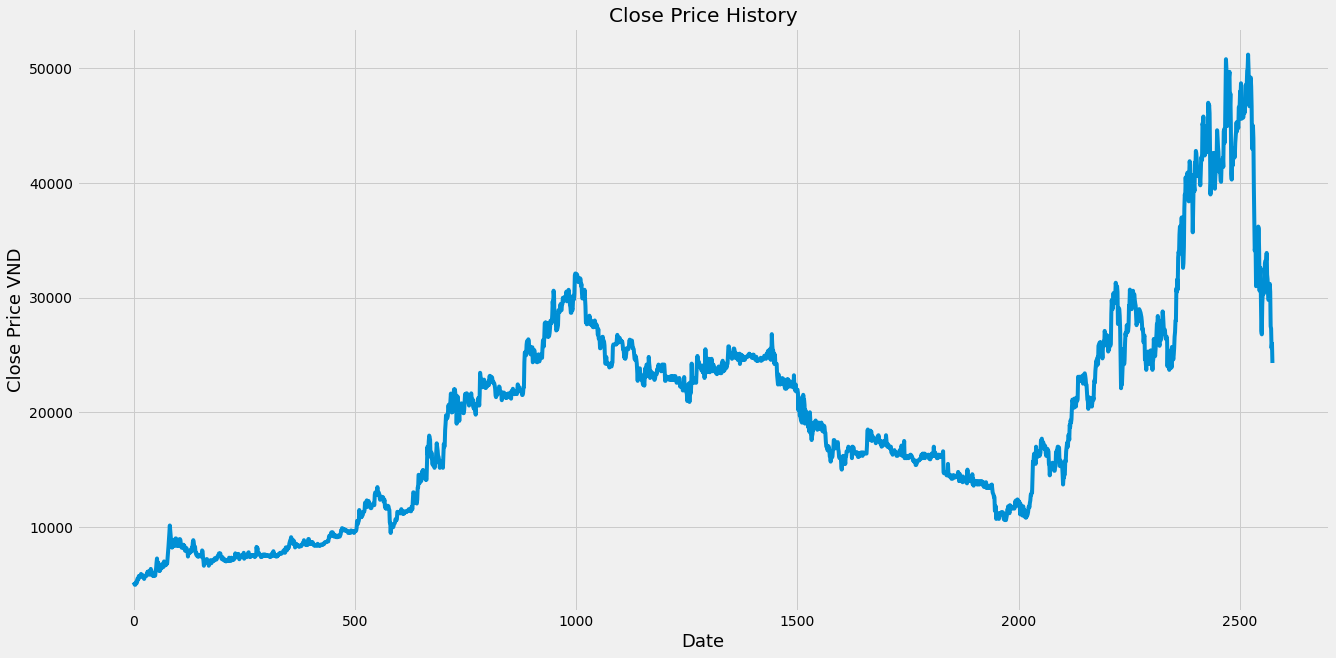

In [21]:
plt.figure(figsize = (20, 10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price VND', fontsize = 18)
plt.show

In [22]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2060

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00473554],
       [0.00315703],
       [0.00157851],
       ...,
       [0.44643861],
       [0.45508801],
       [0.41832807]])

In [24]:
train_data = scaled_data[0:training_data_len , :]
X_train = []
y_train = []

for i in range (60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.00473554, 0.00315703, 0.00157851, 0.        , 0.        ,
       0.00473554, 0.00237858, 0.00315703, 0.00473554, 0.01182805,
       0.00947109, 0.01102798, 0.01654197, 0.01498508, 0.01498508,
       0.01418501, 0.01734204, 0.02049907, 0.01654197, 0.01654197,
       0.01734204, 0.01812049, 0.01654197, 0.0126065 , 0.01102798,
       0.01576353, 0.01576353, 0.01576353, 0.01734204, 0.01892056,
       0.01734204, 0.02363448, 0.02127752, 0.02521299, 0.02521299,
       0.02127752, 0.02285603, 0.01892056, 0.02285603, 0.02994854,
       0.02521299, 0.02443455, 0.01892056, 0.01812049, 0.01654197,
       0.01812049, 0.01654197, 0.01892056, 0.01812049, 0.01734204,
       0.02679151, 0.03072698, 0.04175496, 0.04962591, 0.03859793,
       0.0323055 , 0.04175496, 0.02914847, 0.02601306, 0.03388401])]
[0.026791506292436096]



In [25]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2000, 60, 1)

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
model.fit(X_train, y_train, batch_size = 1, epochs = 20)

Epoch 1/20
2000/2000 [==============================] - 60s 28ms/step - loss: 8.9108e-04
Epoch 2/20
2000/2000 [==============================] - 57s 29ms/step - loss: 3.0308e-04
Epoch 3/20
2000/2000 [==============================] - 57s 28ms/step - loss: 2.0129e-04
Epoch 4/20
2000/2000 [==============================] - 57s 28ms/step - loss: 1.8219e-04
Epoch 5/20
2000/2000 [==============================] - 58s 29ms/step - loss: 1.6495e-04
Epoch 6/20
2000/2000 [==============================] - 58s 29ms/step - loss: 1.6389e-04
Epoch 7/20
2000/2000 [==============================] - 57s 29ms/step - loss: 1.3034e-04
Epoch 8/20
2000/2000 [==============================] - 57s 28ms/step - loss: 1.3620e-04
Epoch 9/20
2000/2000 [==============================] - 56s 28ms/step - loss: 1.4045e-04
Epoch 10/20
2000/2000 [==============================] - 58s 29ms/step - loss: 1.4254e-04
Epoch 11/20
2000/2000 [==============================] - 60s 30ms/step - loss: 1.2441e-04
Epoch 12/20
2000/20

In [29]:
test_data = scaled_data[training_data_len - 60: , :]
X_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [32]:
X_test = np.array(X_test)

In [33]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


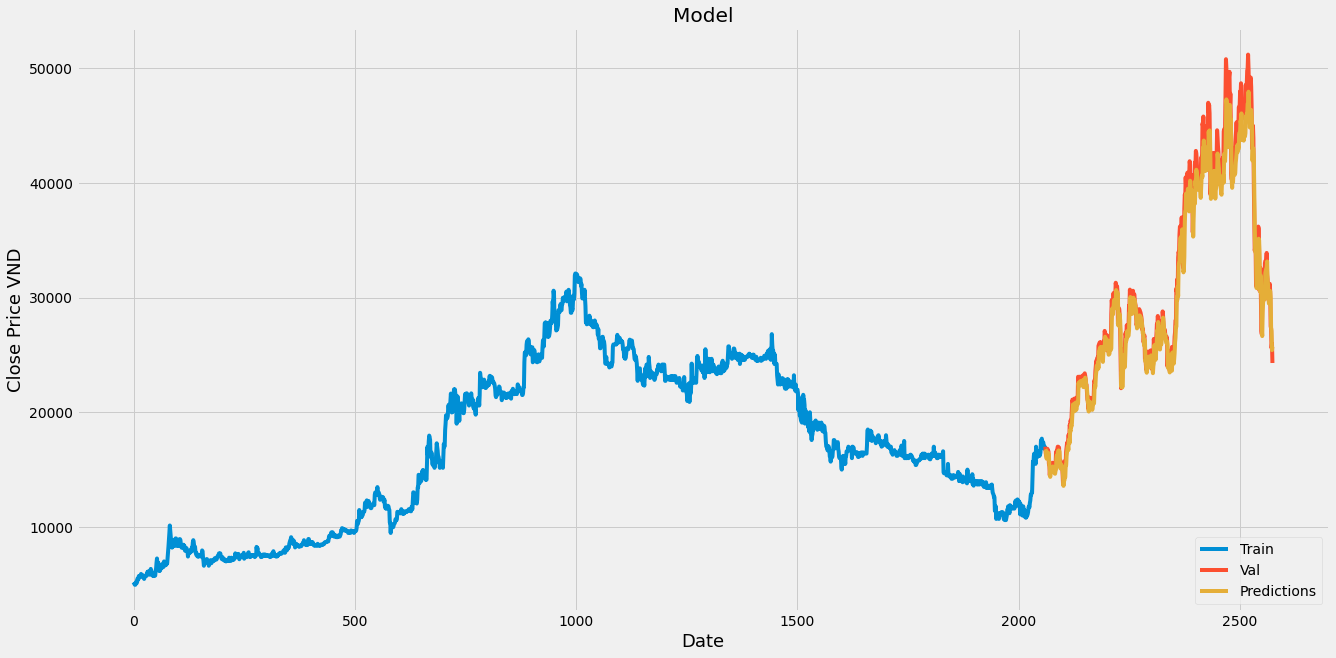

In [35]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (20, 10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price VND', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [36]:
model.save('Stock_prediction.h5')